
<h1 size=30 style="text-align:center;">Prediction of Revolving Balance</h1>

![alt text here](https://www.boulderweekly.com/wp-content/uploads/2020/03/shutterstock_696138958-scaled.jpg)

## Index
* Introduction
* Business Problem
* Objective
* Looking at the Data
* Modifications to the Data
* Describing the Data
* Visualizations and Inferences
    * Impact of <b>Terms</b> on <b>Loan Amount</b>, <b>Total Interest Received</b> and <b>Total Revolving Balance</b>
* Correlation Between Columns
* Final Data after Cleaning and Retaining the Required Columns
* Model Building and Result

# Introduction
<b>Credit</b> is the trust which allows one party to provide money or resources to another party wherein the second party does not reimburse the first party immediately (thereby generating a debt), but promises either to repay or return those resources (or other materials of equal value) at a later date.In other words, credit is a method of making reciprocity formal, legally enforceable, and extensible to a large group of unrelated people.

The resources provided may be financial (e.g. granting a loan), or they may consist of goods or services (e.g. consumer credit). Credit encompasses any form of deferred payment.Credit is extended by a creditor, also known as a lender, to a debtor, also known as a borrower.

![alt text here](http://www.versusbattle.com/wp-content/uploads/2014/06/credit-card.jpg)

With revolving credit, a consumer has a line of credit he can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan.
    Revolving credit, such as a credit card, allows a consumer to make purchases up to a certain spending limit and pay down the debt each month. As long as the spending cap has not been reached, the consumer can make purchases using the line of credit. He does not have to pay off the total amount borrowed every month, but any balance that carries over month to month is the revolving balance.

A revolving balance accrues interest, which is why some smart credit card users pay off their statement balances every month, never paying interest. High revolving balances may indicate that a borrower is relying too much on credit. That is why it is important to keep revolving balances to a minimum. A consumer who uses too much of the credit extended to them can hurt his credit score.

## Business Problem
As a bank or investor who works in checking revolving balance can charge higher interest rates and convenience fees as there is lot of risk associated in customer paying the amount. The company wants to predict the revolving balance maintained by the customer so that they can derive marketing strategies individually.

## Objective
Predicting the revolving balance maintained by the customer who has availed loan from a bank

## Looking at the Data
The data consisting of customers details is provided by the bank with the folowing columns:-
* member_id: <b style="color:orange;">unique ID assigned to each member</b>
* loan_amnt: <b style="color:orange;">loan amount applied by the member</b>
* terms:  <b style="color:orange;">term of loan (in months)</b>
* batch_ID: <b style="color:orange;">batch numbers allotted to members</b>
* Rate_of_intrst:  <b style="color:orange;">interest rate (%) on loan</b>
* Grade: <b style="color:orange;">grade assigned by the bank</b>
* sub_grade: <b style="color:orange;">grade assigned by the bank</b>
* emp_designation: <b style="color:orange;">Designation of employee in his respective company</b>
* Experience: <b style="color:orange;">employment length, where 0 means less than one year and 10 means ten or more years</b>
* home_ownership: <b style="color:orange;">status of home ownership</b>
* annual_inc: <b style="color:orange;">annual income reported by the member</b>
* verification_status: <b style="color:orange;">status of income verified by the bank</b>
* purpose: <b style="color:orange;">purpose of loan</b>
* State: <b style="color:orange;">living state of member</b>
* debt-to-income ratio: <b style="color:orange;">ratio of member's total monthly debt</b>
* Delinquency of past 2 years:  <b style="color:orange;">failure to pay an outstanding debt by due date</b>
* inq_6mths: <b style="color:orange;">Inquiries made in past 6 months</b>
* total_months_delinq : <b style="color:orange;">number of months since last delinq</b>
* Nmbr_months_last_record: <b style="color:orange;">number of months since last public record</b>
* Numb_credit_lines:<b style="color:orange;">number number of derogatory public records of open credit line in member's credit line</b> 
* pub_rec Tota_credit_revolving_balance: <b style="color:orange;">total credit revolving balance</b>
* total_credits: <b style="color:orange;">total number of credit lines available in members credit line</b>
* list_status <b style="color:orange;">unique listing status of the loan - W(Waiting),F(Forwarded)</b>
* int_rec: <b style="color:orange;">Total interest received till date</b>
* late_fee_rev: <b style="color:orange;">Late fee received till date</b> 
* recov_chrg: <b style="color:orange;">post charge off gross recovery</b> 
* collection_recovery_fee: <b style="color:orange;">post charge off collection fee</b> 
* exc_med_colle_12mon: <b style="color:orange;">number of collections in last 12 months excluding medical collections</b> 
* since_last_major_derog: <b style="color:orange;">months since most recent 90 day or worse rating</b> 
* application_type: <b style="color:orange;">indicates when the member is an individual or joint</b> 
* verification_status_joint: <b style="color:orange;">indicates if the joint members income was verified by the bank</b> 
* last_pay_week: <b style="color:orange;">indicates how long (in weeks) a member has paid EMI after batch enrolled</b> 
* nmbr_acc_delinq: <b style="color:orange;">number of accounts on which the member isdelinquent</b> 
* colle_amt: total <b style="color:orange;">collection amount ever owed</b> 
* curr_bal: <b style="color:orange;">total current balance of all accounts</b>

From the data shown below (First 10 records) we have to predict the total revolving balance <b>(Highlighted in red)</b>

In [31]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as rsq
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
df=pd.read_csv('project_data.csv',engine='python')

In [32]:
def highlight_color(x):
    r='background-color:red'
    tempdf=pd.DataFrame('',index=x.index,columns=x.columns)
    tempdf.iloc[:,21]=r
    return tempdf
df.head(10).style.apply(highlight_color,axis=None)

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.190000,E,E3,clerk,9 years,OWN,28700.000000,Source Verified,debt_consolidation,FL,33.880000,0.000000,1.000000,50.000000,75.000000,14.000000,1.000000,22515.000000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,74.000000,INDIVIDUAL,nan,26th week,0.000000,0.000000,28699.000000
1,70011223,4800,36 months,BAT1586599,10.990000,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.000000,Source Verified,home_improvement,MD,3.640000,0.000000,1.000000,nan,nan,6.000000,0.000000,7624.000000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,9th week,0.000000,0.000000,9974.000000
2,70255675,10000,36 months,BAT1586599,7.260000,A,A4,Driver,2 years,OWN,45000.000000,Not Verified,debt_consolidation,OH,18.420000,0.000000,0.000000,nan,nan,5.000000,0.000000,10877.000000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,9th week,0.000000,65.000000,38295.000000
3,1893936,15000,36 months,BAT4808022,19.720000,D,D5,Us office of Personnel Management,10+ years,RENT,105000.000000,Not Verified,debt_consolidation,VA,14.970000,0.000000,2.000000,46.000000,nan,10.000000,0.000000,13712.000000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,135th week,0.000000,0.000000,55564.000000
4,7652106,16000,36 months,BAT2833642,10.640000,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.000000,Verified,credit_card,CA,20.160000,0.000000,0.000000,nan,nan,11.000000,0.000000,35835.000000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,96th week,0.000000,0.000000,47159.000000
5,10247268,15000,36 months,BAT2575549,8.900000,A,A5,Design Consultant,2 years,MORTGAGE,120000.000000,Not Verified,debt_consolidation,IN,12.300000,0.000000,0.000000,56.000000,nan,18.000000,0.000000,19040.000000,30.000000,f,1957.240000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,113th week,0.000000,0.000000,350619.000000
6,8089625,5000,36 months,,7.900000,A,A4,TOYOTA OF NORTH HOLLYWOOD,5 years,RENT,75000.000000,Source Verified,debt_consolidation,CA,5.700000,0.000000,0.000000,nan,105.000000,13.000000,2.000000,13272.000000,23.000000,f,578.360000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,117th week,0.000000,1023.000000,13272.000000
7,23043116,6000,36 months,nan,9.170000,B,B1,Banker,8 years,MORTGAGE,54000.000000,Not Verified,credit_card,AL,11.630000,0.000000,1.000000,46.000000,nan,13.000000,0.000000,3484.000000,49.000000,f,637.510000,0.000000,0.000000,0.000000,0.000000,54.000000,INDIVIDUAL,nan,78th week,0.000000,0.000000,272579.000000
8,45900933,6000,36 months,BAT4136152,13.990000,C,C4,LVN,7 years,MORTGAGE,92000.000000,Not Verified,home_improvement,CA,30.850000,0.000000,0.000000,77.000000,nan,16.000000,0.000000,47567.000000,27.000000,w,621.720000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,44th week,0.000000,0.000000,281521.000000
9,41272507,34550,60 months,BAT4694572,17.140000,D,D4,Registered Nurse,2 years,MORTGAGE,72000.000000,Verified,debt_consolidation,KY,33.920000,0.000000,0.000000,nan,nan,12.000000,0.000000,30040.000000,30.000000,w,5535.460000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,nan,52th week,0.000000,0.000000,76034.000000


## Modifications to the Data
Data is modified to make it robust and unnecessary columns are dropped.

In [33]:
#df[['A','B']]=df[['A','B']].replace([1,3,2],[3,6,7])
df[['purpose']]=df[['purpose']].replace(['car','house','renewable_energy','wedding','vacation','medical','educational'],
                                           ['major_purchase','major_purchase','small_business','others','others','medica(or)education','medica(or)education'])

In [34]:
#dropping the unnecessary columns
df=df.iloc[:,[1,2,4,5,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,33,34,35]]
def highlight1_color(x):
    r='background-color:red'
    tempdf=pd.DataFrame('',index=x.index,columns=x.columns)
    tempdf.iloc[:,16]=r
    return tempdf
df.head().style.apply(highlight1_color,axis=None)

,loan_amnt,terms,Rate_of_intrst,grade,Experience,home_ownership,annual_inc,verification_status,purpose,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,36 months,19.190000,E,9 years,OWN,28700.000000,Source Verified,debt_consolidation,33.880000,0.000000,1.000000,50.000000,75.000000,14.000000,1.000000,22515.000000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,74.000000,INDIVIDUAL,0.000000,0.000000,28699.000000
1,4800,36 months,10.990000,B,< 1 year,MORTGAGE,65000.000000,Source Verified,home_improvement,3.640000,0.000000,1.000000,nan,nan,6.000000,0.000000,7624.000000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,0.000000,0.000000,9974.000000
2,10000,36 months,7.260000,A,2 years,OWN,45000.000000,Not Verified,debt_consolidation,18.420000,0.000000,0.000000,nan,nan,5.000000,0.000000,10877.000000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,0.000000,65.000000,38295.000000
3,15000,36 months,19.720000,D,10+ years,RENT,105000.000000,Not Verified,debt_consolidation,14.970000,0.000000,2.000000,46.000000,nan,10.000000,0.000000,13712.000000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,0.000000,0.000000,55564.000000
4,16000,36 months,10.640000,B,10+ years,RENT,52000.000000,Verified,credit_card,20.160000,0.000000,0.000000,nan,nan,11.000000,0.000000,35835.000000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,nan,INDIVIDUAL,0.000000,0.000000,47159.000000


## Describing the Data

In [73]:
df.describe()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,...,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,...,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,...,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,...,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,...,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,...,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,...,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [19]:
df.describe(include='object')

,terms,grade,Experience,home_ownership,verification_status,purpose,initial_list_status,application_type
count,887379,887379,842554,887379,887379,887379,887379,887379
unique,2,7,11,6,3,9,2,2
top,36 months,B,10+ years,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL
freq,621125,254535,291569,443557,329558,524215,456848,886868


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizations and Inferences

<h3>Let's look at few inferences that we can get from the data</h3>


<font size=4>Impact of <b>Terms</b> on <b>Loan Amount</b>, <b>Total Interest Received</b> and <b>Total Revolving Balance</b></font>

In [21]:
def bar2_chart(Category):
    if(Category.lower()=="loan amount"):
        sns.barplot(x=df['terms'],y=df['loan_amnt '])
        plt.xlabel('Terms',fontsize=16)
        plt.ylabel('Loan Amount',fontsize=16)
        plt.title('Loan Amount vs Terms',fontsize=20)
    elif(Category.lower()=="revolving balance"):
        sns.barplot(x=df['terms'],y=df['total revol_bal'])
        plt.xlabel('Terms',fontsize=16)
        plt.ylabel('Total Revolving Balance',fontsize=16)
        plt.title('Total Revolving Balance vs Terms',fontsize=20)
    elif(Category.lower()=="interest received"):
        sns.barplot(x=df['terms'],y=df['total_rec_int'])
        plt.xlabel('Terms',fontsize=16)
        plt.ylabel('Total Interest Received',fontsize=16)
        plt.title('Total Interest Received vs Terms',fontsize=20)
    else:
        print("Please enter 'Loan Amount' or 'Revolving Balance' or 'Interest Received' to analyze the data")

interact(bar2_chart, Category='Loan Amount')


interactive(children=(Text(value='Loan Amount', description='Category'), Output()), _dom_classes=('widget-inte…

<function __main__.bar2_chart(Category)>

From the above visual we can infer that both Loan Amount and Revolving Balance is high for the Term of <b>60 Months i.e. One Year</b>. This generally occurs as one year is a long time and people have the confidence to pay the loan with interest within that time and revolving balance keeps increasing as the time increases


<font size=4>Impact of <b>Grade</b> on <b>Loan Amount</b>, <b>Total Interest Received</b> and <b>Total Revolving Balance</b> with respect to <b>Terms</b> and <b>Verification Status</b><font>

In [22]:
def bar_chart(Category):
    if(Category=="Terms"):
        sns.barplot(x=df['grade'],y=df['loan_amnt '],hue=df['terms'])
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Loan Amount',fontsize=16)
        plt.title('Loan Amount vs Grade w.r.t Terms',fontsize=20)
    elif(Category=="Status"):
        sns.barplot(x=df['grade'],y=df['loan_amnt '],hue=df['verification_status'])
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Status',fontsize=16)
        plt.title('Loan Amount vs Grade w.r.t Verification Status',fontsize=20)
    elif(Category=="Plain"):
        sns.barplot(x=df['grade'],y=df['loan_amnt '])
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Loan Amount',fontsize=16)
        plt.title('Loan Amount vs Grade',fontsize=20)
    else:
        print("Please enter 'Terms','Status' or 'Plain' to analyze the data")

interact(bar_chart, Category='Plain')

interactive(children=(Text(value='Plain', description='Category'), Output()), _dom_classes=('widget-interact',…

<function __main__.bar_chart(Category)>

From the above visual we can conclude that under the term of <b>'36 months'</b> people under grade <b>'A'</b> have taken the highest loan amount and under the term of <b>'60 months'</b> people under grade <b>'G'</b> have taken the highest loan Amount. <b>Overall grade 'G' has the highest Loan Amount</b> 

In [23]:
def bar1_chart(Category):
    if(Category=="Terms"):
        sns.barplot(x=df['grade'],y=df['total revol_bal'],hue=df['terms'])
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Total Revolving Balance',fontsize=16)
        plt.title('Total Revolving Balance vs Grade w.r.t Terms',fontsize=20)
    elif(Category=="Status"):
        sns.barplot(x=df['grade'],y=df['total revol_bal'],hue=df['verification_status'],ci=None)
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Total Revolving Balance',fontsize=16)
        plt.title('Total Revolving Balance vs Grade w.r.t Verification Status',fontsize=20)
    elif(Category=="Plain"):
        sns.barplot(x=df['grade'],y=df['total revol_bal'])
        plt.xlabel('Grade',fontsize=16)
        plt.ylabel('Total Revolving Balance',fontsize=16)
        plt.title('Total Revolving Balance vs Grade',fontsize=20)
    else:
        print("Please enter 'Terms','Status' or 'Plain' to analyze the data")

interact(bar1_chart, Category='Plain')

interactive(children=(Text(value='Plain', description='Category'), Output()), _dom_classes=('widget-interact',…

<function __main__.bar1_chart(Category)>

From the above visual we can conclude that under the term of <b>'36 months'</b> people under grade <b>'A'</b> & <b>'G'</b> have the highest revolving balance and under the term of <b>'60 months'</b> people under grade <b>'A'</b> have the highest total revolving balance.<b>Overall grade 'A' has the highest revolving balance</b>

## Correlation Between Columns
Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [36]:
df.corr()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,...,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
loan_amnt,1.000000,0.145023,0.332698,0.020675,-0.000159,-0.034168,-0.038080,-0.010734,0.198906,-0.081177,...,0.222639,0.533916,0.031395,0.073150,0.052205,-0.016650,-0.037278,0.003947,-0.004275,0.328782
Rate_of_intrst,0.145023,1.000000,-0.072786,0.079903,0.055178,0.227650,-0.030033,0.022485,-0.010381,0.052156,...,-0.038618,0.445679,0.057150,0.106840,0.070867,0.013336,-0.011180,0.026478,0.001130,-0.091408
annual_inc,0.332698,-0.072786,1.000000,-0.087410,0.047470,0.035193,-0.050350,-0.096151,0.138392,-0.008341,...,0.187335,0.128535,0.013500,0.007717,0.006630,-0.003936,-0.037394,0.014775,0.001096,0.418332
debt_income_ratio,0.020675,0.079903,-0.087410,1.000000,-0.002831,-0.008106,0.001447,0.065933,0.144250,-0.022926,...,0.108056,0.008380,-0.005748,0.001162,0.002159,-0.000292,0.007736,0.003205,-0.002084,-0.007282
delinq_2yrs,-0.000159,0.055178,0.047470,-0.002831,1.000000,0.021375,-0.562654,-0.088179,0.051189,-0.011004,...,0.122713,0.001665,0.017432,-0.000729,0.000989,0.063016,-0.424556,0.130326,0.000207,0.064762
inq_last_6mths,-0.034168,0.227650,0.035193,-0.008106,0.021375,1.000000,0.014748,-0.086349,0.111235,0.056870,...,0.135584,0.085585,0.031637,0.045590,0.034007,0.006850,0.020546,-0.005329,0.003171,0.034338
mths_since_last_delinq,-0.038080,-0.030033,-0.050350,0.001447,-0.562654,0.014748,1.000000,0.019038,-0.043182,0.096646,...,-0.044920,-0.028208,-0.021321,-0.004525,-0.005180,-0.035834,0.699356,-0.139118,0.006466,-0.093911
mths_since_last_record,-0.010734,0.022485,-0.096151,0.065933,-0.088179,-0.086349,0.019038,1.000000,0.012445,-0.224883,...,-0.177856,0.083147,-0.025561,0.013120,0.002846,-0.020923,0.034511,-0.015947,-0.059586,-0.026634
numb_credit,0.198906,-0.010381,0.138392,0.144250,0.051189,0.111235,-0.043182,0.012445,1.000000,-0.025301,...,0.695075,0.061223,-0.009606,0.001560,0.003217,0.009610,0.009059,0.017752,0.000124,0.244134
pub_rec,-0.081177,0.052156,-0.008341,-0.022926,-0.011004,0.056870,0.096646,-0.224883,-0.025301,1.000000,...,0.012472,-0.060064,-0.011445,-0.014477,-0.008795,0.021039,0.114771,0.000349,0.006891,-0.075814


<AxesSubplot:>

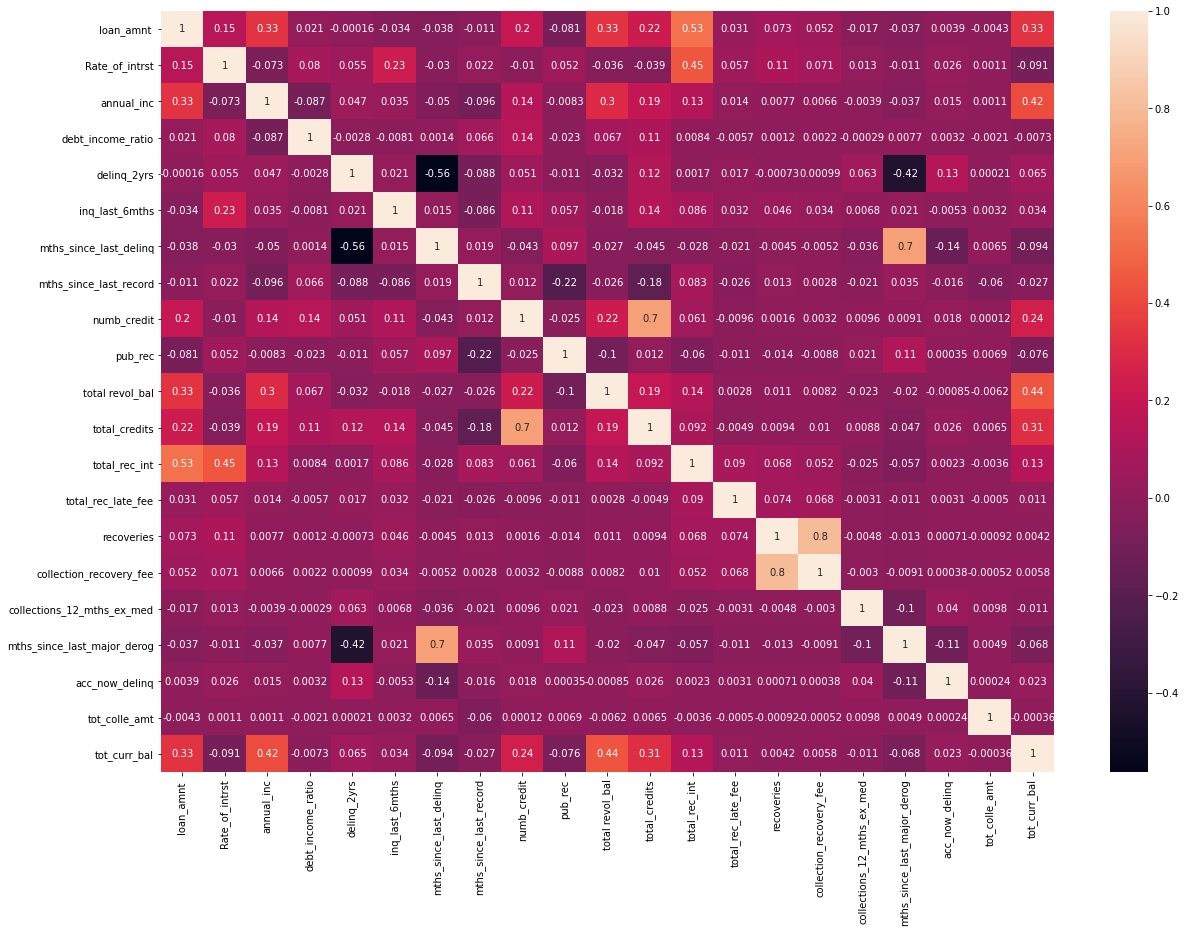

In [91]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(),annot=True)

In [41]:
#reading the data
df_xg=pd.read_csv(r"C:\Users\91807\Desktop\Excelr\data_no_null.csv",encoding='latin1')

In [42]:
df_xg.drop(columns='Unnamed: 0',inplace=True,axis=1)

In [43]:
#df[['A','B']]=df[['A','B']].replace([1,3,2],[3,6,7])
df_xg[['purpose']]=df_xg[['purpose']].replace(['car','house','renewable_energy','wedding','vacation','medical','educational'],
                                           ['major_purchase','major_purchase','small_business','others','others','medica(or)education','medica(or)education'])

In [44]:
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

In [45]:
categorical=[col for col in df_xg.columns if df_xg[col].dtypes==np.object]

In [46]:
ordinal_enc=CountFrequencyCategoricalEncoder(
encoding_method='frequency',
  variables=categorical)
df_xg_fre_enc=ordinal_enc.fit_transform(df_xg)

## Final Data after Cleaning and Retaining the Required Columns
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting.

   After cleansing, a data set should be consistent with other similar data sets in the system. The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities in different stores. Data cleaning differs from data validation in that validation almost invariably means data is rejected from the system at entry and is performed at the time of entry, rather than on batches of data.

In [50]:
df_xg_fre_enc[['loan_amnt ', 'Rate_of_intrst', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
        'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'Experience',
       'mths_since_last_delinq', 'tot_curr_bal', 'tot_colle_amt']].head(10)


,loan_amnt,Rate_of_intrst,grade,home_ownership,annual_inc,verification_status,purpose,debt_income_ratio,delinq_2yrs,inq_last_6mths,...,pub_rec,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,Experience,mths_since_last_delinq,tot_curr_bal,tot_colle_amt
0,14350,19.19,0.079678,0.098571,28700.0,0.371384,0.590745,33.88,0.0,1.0,...,1.0,28.0,0.514829,1173.84,0.0,0.0,0.039055,50.0,28699.0,0.0
1,4800,10.99,0.286839,0.499851,65000.0,0.371384,0.058407,3.64,0.0,1.0,...,0.0,13.0,0.485171,83.95,0.0,0.0,0.079566,31.0,9974.0,0.0
2,10000,7.26,0.167011,0.098571,45000.0,0.300604,0.590745,18.42,0.0,0.0,...,0.0,19.0,0.485171,56.47,0.0,0.0,0.088880,31.0,38295.0,65.0
3,15000,19.72,0.157252,0.401313,105000.0,0.300604,0.590745,14.97,0.0,2.0,...,0.0,21.0,0.514829,4858.62,0.0,0.0,0.379087,46.0,55564.0,0.0
4,16000,10.64,0.286839,0.401313,52000.0,0.328012,0.232349,20.16,0.0,0.0,...,0.0,27.0,0.485171,2296.41,0.0,0.0,0.379087,31.0,47159.0,0.0
5,15000,8.90,0.167011,0.499851,120000.0,0.300604,0.590745,12.30,0.0,0.0,...,0.0,30.0,0.514829,1957.24,0.0,0.0,0.088880,56.0,350619.0,0.0
6,5000,7.90,0.167011,0.401313,75000.0,0.371384,0.590745,5.70,0.0,0.0,...,2.0,23.0,0.514829,578.36,0.0,0.0,0.062774,31.0,13272.0,1023.0
7,6000,9.17,0.286839,0.499851,54000.0,0.300604,0.232349,11.63,0.0,1.0,...,0.0,49.0,0.514829,637.51,0.0,0.0,0.049534,46.0,272579.0,0.0
8,6000,13.99,0.277063,0.499851,92000.0,0.300604,0.058407,30.85,0.0,0.0,...,0.0,27.0,0.485171,621.72,0.0,0.0,0.050254,77.0,281521.0,0.0
9,34550,17.14,0.157252,0.499851,72000.0,0.328012,0.590745,33.92,0.0,0.0,...,0.0,30.0,0.485171,5535.46,0.0,0.0,0.088880,31.0,76034.0,0.0


In [51]:
X_xg_1=df_xg_fre_enc[['loan_amnt ', 'Rate_of_intrst', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
        'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'Experience',
       'mths_since_last_delinq', 'tot_curr_bal', 'tot_colle_amt']]
Y_xg_1=df_xg_fre_enc[['total revol_bal']]

## Splitting into Training and Testing Data

### Training Data
The observations in the training set form the experience that the algorithm uses to learn. In supervised learning problems, each observation consists of an observed output variable and one or more observed input variables.

In [53]:
#lets separate into training and testing set

X_train_xg_1, X_test_xg_1, y_train_xg_1, y_test_xg_1 = train_test_split(
                                                   X_xg_1,  #predict
                                                   Y_xg_1 ,  #target
test_size=0.2,#percentage of obs in test set
random_state=2) # seed to insure reproducbility

X_train_xg_1.head(10)

,loan_amnt,Rate_of_intrst,grade,home_ownership,annual_inc,verification_status,purpose,debt_income_ratio,delinq_2yrs,inq_last_6mths,...,pub_rec,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,Experience,mths_since_last_delinq,tot_curr_bal,tot_colle_amt
847483,11525,15.80,0.277063,0.401313,33000.0,0.328012,0.590745,15.75,0.0,3.0,...,0.0,21.0,0.514829,1831.35,0.0,0.0,0.059196,31.0,87096.5,0.0
422674,16000,7.89,0.167011,0.098571,64000.0,0.371384,0.232349,19.01,2.0,0.0,...,0.0,44.0,0.485171,91.17,0.0,0.0,0.379087,15.0,114080.0,0.0
707014,24000,13.66,0.277063,0.499851,90000.0,0.300604,0.012342,0.84,0.0,1.0,...,0.0,12.0,0.514829,2923.38,0.0,0.0,0.379087,46.0,122471.0,0.0
193866,5000,12.69,0.277063,0.401313,56000.0,0.371384,0.590745,21.13,0.0,2.0,...,0.0,31.0,0.485171,307.31,0.0,0.0,0.379087,29.0,20933.0,0.0
60036,12000,8.67,0.286839,0.499851,61000.0,0.371384,0.590745,10.09,0.0,0.0,...,0.0,15.0,0.485171,957.58,15.0,0.0,0.379087,50.0,20822.0,0.0
137487,25000,10.99,0.286839,0.499851,90000.0,0.371384,0.232349,22.71,2.0,0.0,...,0.0,29.0,0.485171,1510.76,0.0,0.0,0.379087,8.0,335667.0,247.0
354868,6000,16.99,0.157252,0.401313,39000.0,0.371384,0.590745,23.32,0.0,2.0,...,0.0,20.0,0.514829,690.95,0.0,0.0,0.379087,45.0,82845.0,60.0
91299,14875,14.99,0.277063,0.401313,54000.0,0.371384,0.232349,13.00,0.0,1.0,...,1.0,16.0,0.485171,1899.32,0.0,0.0,0.079566,68.0,9611.0,0.0
693082,15000,7.69,0.167011,0.499851,55000.0,0.300604,0.232349,19.05,0.0,0.0,...,0.0,20.0,0.485171,854.58,0.0,0.0,0.059196,32.0,102906.0,0.0
713670,16000,23.40,0.079678,0.499851,100000.0,0.371384,0.590745,9.25,1.0,2.0,...,0.0,32.0,0.514829,7048.66,0.0,0.0,0.379087,20.0,230552.0,0.0


### Test Data
The test set is a set of observations used to evaluate the performance of the model using some performance metric. It is important that no observations from the training set are included in the test set. If the test set does contain examples from the training set, it will be difficult to assess whether the algorithm has learned to generalize from the training set or has simply memorized it.

In [71]:
y_test_xg_1.head()

,total revol_bal
257329,50171.0
578111,12842.0
9432,61261.0
194402,22294.0
23248,3253.0


## Model Building
We are using XGBoost for building the model. Let us dive in to know a bit about XGBoost:-
XGBoost is a software library that you can download and install on your machine, then access from a variety of interfaces. Specifically, XGBoost supports the following main interfaces:

Command Line Interface (CLI).
* C++ (the language in which the library is written).
* Python interface as well as a model in scikit-learn.
* R interface as well as a model in the caret package.
* Julia.
* Java and JVM languages like Scala and platforms like Hadoop.

### XGBoost Features
The library is laser focused on computational speed and model performance, as such there are few frills. Nevertheless, it does offer a number of advanced features.

### Model Features
The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

* <b>Gradient Boosting</b> algorithm also called gradient boosting machine including the learning rate.
* <b>Stochastic Gradient Boosting</b> with sub-sampling at the row, column and column per split levels.
* <b>Regularized Gradient Boosting</b> with both L1 and L2 regularization.

### Algorithm Features
The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include:

* <b>Sparse Aware</b> implementation with automatic handling of missing data values.
* <b>Block Structure</b> to support the parallelization of tree construction.
* <b>Continued Training</b> so that you can further boost an already fitted model on new data.

XGBoost is free open source software available for use under the permissive Apache-2 license.

### Why Use XGBoost?
The two reasons to use XGBoost are also the two goals of the project:

* Execution Speed.
* Model Performance.

## Model Results of the given Data

Fitting 5 folds for each of 5 candidates, totalling 25 fits

<b>[Parallel(n_jobs=-1)]:</b> Using backend LokyBackend with 12 concurrent workers.

<b>[Parallel(n_jobs=-1)]:</b> Done  11 out of  25 | elapsed: 11.2min remaining: 14.3min

<b>[Parallel(n_jobs=-1)]:</b> Done  20 out of  25 | elapsed: 24.7min remaining:  6.2min

<b>[Parallel(n_jobs=-1)]:</b> Done  25 out of  25 | elapsed: 25.1min finished


{'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1}

XGBRegressor

(base_score=0.5, booster='gbtree', colsample_bylevel=1,
colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
importance_type='gain', interaction_constraints='',
learning_rate=0.05, max_delta_step=0, max_depth=6,
min_child_weight=3, missing=nan, monotone_constraints='()',
n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
tree_method='exact', validate_parameters=1, verbosity=None)

<b>Train R^2</b>: 0.47750063964378486

<b>Test R^2</b>: 0.4295010667285101

<b>Train RMSE</b>: 16151.415766855573
    
<b>Test RMSE</b>: 17186.03935598678

<!DOCTYPE html>
<html>
<body>

<h3 style="text-align:center;">Comparision</h3>

<table style="width:100%">
  <tr>
    <th style="text-align:center;">Index</th>
    <th style="text-align:center;">Total Revol_Bal</th> 
    <th style="text-align:center;">Prediction</th>
  </tr>
  <tr>
    <td style="text-align:center;">257329</td>
    <td style="text-align:center;">50171.0</td>
    <td style="text-align:center;">27815.337891</td>
  </tr>
  <tr>
    <td style="text-align:center;">578111</td>
    <td style="text-align:center;">12842.0</td>
    <td style="text-align:center;">14192.339844</td>
  </tr>
  <tr>
    <td style="text-align:center;">9432</td>
    <td style="text-align:center;">61261.0</td>
    <td style="text-align:center;">44856.503906</td>
  </tr>
   <tr>
    <td style="text-align:center;">194402</td>
    <td style="text-align:center;">22294.0</td>
    <td style="text-align:center;">16789.478516</td>
  </tr>
  <tr>
    <td style="text-align:center;">23248</td>
    <td style="text-align:center;">3253.0</td>
    <td style="text-align:center;">6551.927246</td>
  </tr>
</table>

</body>
</html>
